## DATA CLEANING AND EDA 2

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

In [2]:
df = pd.read_pickle("project2_data/prop_cleaned_r1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1181
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Address     1177 non-null   object        
 1   Location    1177 non-null   object        
 2   Price       1164 non-null   float64       
 3   Beds        1053 non-null   Int64         
 4   Baths       1061 non-null   float64       
 5   Sq.Ft.      908 non-null    float64       
 6   $/Sq.Ft.    1177 non-null   object        
 7   On Redfin   1177 non-null   object        
 8   HOA         1164 non-null   float64       
 9   Year Built  1129 non-null   Int64         
 10  Lot Size    1177 non-null   object        
 11  Date Sold   1177 non-null   datetime64[ns]
 12  Zip Code    1177 non-null   object        
 13  prop_type   1177 non-null   object        
 14  year_sold   1177 non-null   int64         
 15  month_sold  1177 non-null   int64         
dtypes: Int64(2), datetime64[

In [4]:
# select features of interest from the dataset
df = df.drop(columns = ["Location", "$/Sq.Ft.", "On Redfin", "Lot Size"])

<AxesSubplot:>

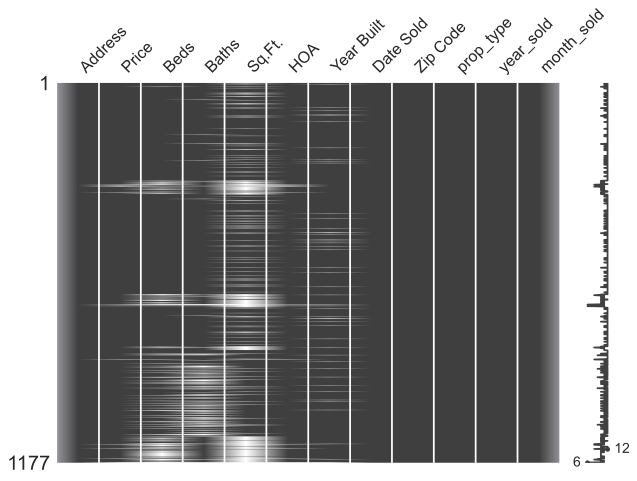

In [5]:
# visualizing missing values in the dataset
mn.matrix(df, figsize=(10, 7))
# features that have the most missing values are size, beds, and baths

<AxesSubplot:>

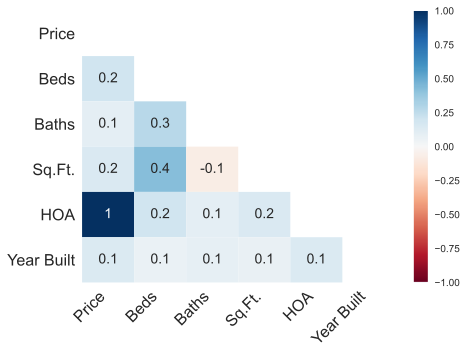

In [6]:
# correlation between missing values of different features
mn.heatmap(df, figsize=(7, 5))
# HOA are missing for properties that have missing price
# Missing size also has relatively high correlation with missing number of bedrooms

### LOOKING into the missing values:

In [7]:
# drop records with missing values in Price
print(df["Price"].isna().sum()) #13 obs missing Price
print(df[df["Price"].isna()])

df.dropna(subset = ["Price"], axis = 0, inplace = True)
# df.info()

13
                           Address  Price  Beds  Baths  Sq.Ft.  HOA  \
317                     848 Naples    NaN  <NA>    1.0     NaN  NaN   
320                 1020 Munich St    NaN     4    2.0     NaN  NaN   
322                   539 32nd Ave    NaN     3    NaN  2052.0  NaN   
323              474 La Grande Ave    NaN  <NA>    1.0     NaN  NaN   
342               418 Ellsworth St    NaN     3    3.0  1300.0  NaN   
689             83 McAllister #205    NaN  <NA>    NaN     NaN  NaN   
694   1310-1314 Greenwich St #1314    NaN  <NA>    NaN     NaN  NaN   
860             529-531 Lombard St    NaN  <NA>    2.0     NaN  NaN   
1124              1551 Oakdale Ave    NaN  <NA>    3.0     NaN  NaN   
1137              691-693 42nd Ave    NaN  <NA>    2.0     NaN  NaN   
1169            1379-1383 23rd Ave    NaN     9    6.0     NaN  NaN   
1180            1265-1267 48th Ave    NaN  <NA>    NaN     NaN  NaN   
1181          4651-4653 Mission St    NaN  <NA>    NaN     NaN  NaN   

  

In [8]:
df[df["Sq.Ft."].isna()].sort_values("Price", ascending = True).head()

Address     Price  Beds  Baths  Sq.Ft.    HOA  Year Built  \
1132  101 Caselli Ave #103  201500.0     4    5.0     NaN    0.0        1927   
1099         1157 Broadway  214000.0     7    8.0     NaN    0.0        1923   
305         33 Aladdin Ter  305000.0  <NA>    2.0     NaN    0.0        1907   
1174         527 Waller St  500000.0  <NA>    1.0     NaN    0.0        1910   
467     1050 North Pt #505  549000.0     0    1.0     NaN  505.0        <NA>   

      Date Sold Zip Code  prop_type  year_sold  month_sold  
1132 2020-10-08    94114  multi_fam       2020          10  
1099 2020-10-26    94109  multi_fam       2020          10  
305  2020-09-29    94133      house       2020           9  
1174 2020-08-05    94117  multi_fam       2020           8  
467  2020-12-16    94109      condo       2020          12

In [9]:
df[df["Sq.Ft."].isna()].sort_values("Price", ascending = True).tail()

Address       Price  Beds  Baths  Sq.Ft.  HOA  Year Built  \
343        2840 Green St   8800000.0     5    4.0     NaN  0.0        1936   
1175     1647 Sanchez St   9100000.0     4    2.0     NaN  0.0        1900   
321   2561 Washington St   9600000.0     5    3.0     NaN  0.0        1900   
1104  3959 Washington St  10500000.0     5    4.0     NaN  0.0        1913   
81       2775 Vallejo St  19750000.0     6    6.5     NaN  0.0        1916   

      Date Sold Zip Code  prop_type  year_sold  month_sold  
343  2020-12-08    94123      house       2020          12  
1175 2020-07-24    94131  multi_fam       2020           7  
321  2020-03-11    94115      house       2020           3  
1104 2020-10-30    94118  multi_fam       2020          10  
81   2020-12-30    94123      house       2020          12

In [10]:
# can I fill in missing size with ($/Sq.Ft.)??
# len(df[(df["$/Sq.Ft."] == "") | (df["$/Sq.Ft."] == "—")]) # there are 272 missing values

# df = pd.read_pickle("project2_data/prop_cleaned_r1")
# mask = (df["Sq.Ft."].isna()) & ((df["$/Sq.Ft."] == "—") | (df["$/Sq.Ft."] == ""))
# len(df[mask])
# # of the 269 obs missing values in size, their ($/Sq.Ft.) are also missing

### Looked at data source and found missing values could be filled in from individual property page <br> -> dropped observations with missing values (maybe more scraping if time permitted)

In [11]:
# drop records with missing values in size
df.dropna(subset = ["Sq.Ft."], axis = 0, inplace = True)
# df.info()

In [12]:
# check missing values in Beds
print(df["Beds"].isna().sum())
df[df["Beds"].isna()].sort_values("prop_type").head()#still have 31 missing, and 30 of them multi-family units
df[df["Beds"].isna()].sort_values("prop_type").tail()

31


Address      Price  Beds  Baths  Sq.Ft.  HOA  Year Built  \
847         3256 Folsom St  1560000.0  <NA>    NaN  2023.0  0.0        <NA>   
845       222-224 23rd Ave  1520000.0  <NA>    NaN  2500.0  0.0        1909   
842     960-964 Filbert St  2250000.0  <NA>    NaN  2740.0  0.0        1913   
972   3716-3718 Taraval St  1016000.0  <NA>    NaN  2550.0  0.0        1948   
1163       311 Potrero Ave  3625000.0  <NA>    6.0  4250.0  0.0        1906   

      Date Sold Zip Code  prop_type  year_sold  month_sold  
847  2020-11-30    94110  multi_fam       2020          11  
845  2020-12-04    94121  multi_fam       2020          12  
842  2020-12-23    94133  multi_fam       2020          12  
972  2020-10-02    94116  multi_fam       2020          10  
1163 2020-02-14    94103  multi_fam       2020           2

In [13]:
# check missing values in Baths
print(df["Baths"].isna().sum())
df[df["Baths"].isna()].sort_values("prop_type").head()#still have 99 missing values, with 92 multi-family units
df[df["Baths"].isna()].sort_values("prop_type").tail()

99


Address      Price  Beds  Baths   Sq.Ft.    HOA  Year Built  \
924       17-23 Hoff St  2000000.0    12    NaN   7896.0    0.0        1910   
922         375 Carl St  2585000.0    12    NaN   4260.0    0.0        1961   
936       1748 Grove St  1555000.0  <NA>    NaN   3304.0    0.0        1921   
1098      1445 Mason St  6850000.0    22    NaN  13132.0    0.0        1913   
725   99 Rausch St #521  1300000.0     1    NaN    834.0  720.0        2018   

      Date Sold Zip Code  prop_type  year_sold  month_sold  
924  2020-11-10    94110  multi_fam       2020          11  
922  2020-11-16    94117  multi_fam       2020          11  
936  2020-10-30    94117  multi_fam       2020          10  
1098 2020-01-21    94133  multi_fam       2020           1  
725  2020-02-19    94103  townhouse       2020           2

### Some values could be filled from indivial page, and both Beds and Baths seemed to be missing @ random <br> -> dropped missing values

In [14]:
# drop observations with missing values in Beds and Baths
df.dropna(subset = ["Beds", "Baths"], axis = 0, inplace = True)
# df.info()

In [15]:
# check missing values in Year Built
df["Year Built"].isna().sum() # there are still 28 missing values in Year Built

28

In [16]:
df[df["Year Built"].isna()].sort_values("Price").head()

Address     Price  Beds  Baths  Sq.Ft.     HOA  Year Built  \
423  555 Fulton St #410  699000.0     1    1.0   512.0   486.0        <NA>   
498  555 Fulton St #215  719000.0     1    1.0   708.0   680.0        <NA>   
473     1163 Alabama St  790000.0     2    1.0   988.0   420.0        <NA>   
704       720 York #212  800000.0     1    1.0   618.0   553.0        <NA>   
454  1050 North Pt #202  850000.0     2    1.0   984.0  1171.0        <NA>   

     Date Sold Zip Code  prop_type  year_sold  month_sold  
423 2020-05-28    94102      condo       2020           5  
498 2020-11-18    94102      condo       2020          11  
473 2020-12-10    94110      condo       2020          12  
704 2020-11-23    94110  townhouse       2020          11  
454 2020-12-24    94109      condo       2020          12

In [17]:
df[df["Year Built"].isna()].sort_values("Price").tail()

Address      Price  Beds  Baths  Sq.Ft.    HOA  Year Built  \
733  1788 Clay St Unit TH3  2200000.0     3    2.0  1710.0  955.0        <NA>   
239       152 Fairmount St  2400000.0     3    2.0  1716.0    0.0        <NA>   
7       28-30 Santa Marina  2500000.0     6    4.0  2872.0    0.0        <NA>   
510      369 Arguello Blvd  3250000.0     5    2.5  3315.0  200.0        <NA>   
87             3041 Laguna  5795000.0     5    4.5  3774.0    0.0        <NA>   

     Date Sold Zip Code  prop_type  year_sold  month_sold  
733 2021-01-13    94109  townhouse       2021           1  
239 2020-07-24    94131      house       2020           7  
7   2020-10-02    94110      house       2020          10  
510 2020-11-10    94118      condo       2020          11  
87  2020-12-28    94123      house       2020          12

### Looked like Year Built were missing at random across price, beds, bath, size <br> -> imputed with random sampling from the range of Year Built

In [18]:
# number of NAs in Year Built
mask = df["Year Built"].isna()
YB_NAs = mask.sum()

# fill in NAs with random sampling
fill = np.random.choice(df[df["Year Built"].notnull()]["Year Built"].values, size = YB_NAs)
df.loc[mask, "Year Built"] = fill
# df.info()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 1138
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Address     806 non-null    object        
 1   Price       806 non-null    float64       
 2   Beds        806 non-null    Int64         
 3   Baths       806 non-null    float64       
 4   Sq.Ft.      806 non-null    float64       
 5   HOA         806 non-null    float64       
 6   Year Built  806 non-null    Int64         
 7   Date Sold   806 non-null    datetime64[ns]
 8   Zip Code    806 non-null    object        
 9   prop_type   806 non-null    object        
 10  year_sold   806 non-null    int64         
 11  month_sold  806 non-null    int64         
dtypes: Int64(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 83.4+ KB


In [20]:
# df.to_pickle("/Users/sarazzzz/Desktop/Metis/CAMP/Metis_project2/prop_df_cleaned")

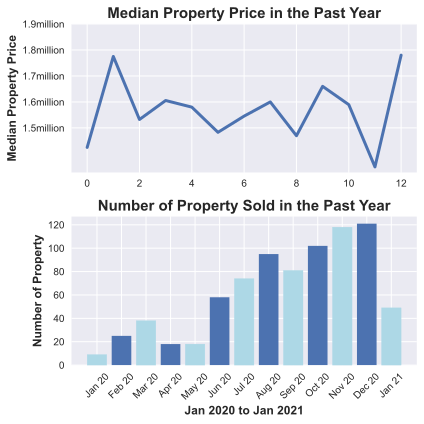

In [21]:
# Does property price goes up or down the past year?
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["figure.dpi"] = 200

price_month = df.groupby(["year_sold", "month_sold"])["Price"].median()
num_prop = df.groupby(["year_sold", "month_sold"])["Price"].count()

plt.subplot(2,1,1)

plt.plot(range(len(price_month)), price_month, linewidth = 3)
plt.title("Median Property Price in the Past Year", fontsize = 15, weight = "bold")
plt.ylabel("Median Property Price", fontsize = 12, weight = "bold")
ytick_lab = ["1.5million", "1.6million", "1.7million", "1.8million", "1.9million"]
plt.yticks(ticks = list(range(1500000, 2000000, 100000)), labels = ytick_lab)

plt.subplot(2,1,2)
# change color of every other bar
barlist = plt.bar(range(len(num_prop)), num_prop)
for bar in range(0, len(barlist), 2):
    barlist[bar].set_color("lightblue")
plt.title("Number of Property Sold in the Past Year", fontsize = 15, weight = "bold")
plt.ylabel("Number of Property", fontsize = 12, weight = "bold")
plt.xlabel("Jan 2020 to Jan 2021", fontsize = 12, weight = "bold")
xtick_lab = ["Jan 20", "Feb 20", "Mar 20", "Apr 20", "May 20", "Jun 20", 
             "Jul 20", "Aug 20", "Sep 20", "Oct 20", "Nov 20", "Dec 20", "Jan 21"]
plt.xticks(range(len(price_month)), xtick_lab, rotation = 45)
plt.tight_layout();
# plt.savefig("project2_images/median_price_past_year.png");

### Create a subset of the features

In [22]:
subset = ["Price", "Beds", "Baths", "Sq.Ft.", "HOA", "Year Built", "Zip Code", "prop_type"]
df2 = df[subset]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 1138
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       806 non-null    float64
 1   Beds        806 non-null    Int64  
 2   Baths       806 non-null    float64
 3   Sq.Ft.      806 non-null    float64
 4   HOA         806 non-null    float64
 5   Year Built  806 non-null    Int64  
 6   Zip Code    806 non-null    object 
 7   prop_type   806 non-null    object 
dtypes: Int64(2), float64(4), object(2)
memory usage: 58.2+ KB


In [23]:
df2.describe()

Price        Beds       Baths        Sq.Ft.          HOA  \
count  8.060000e+02  806.000000  806.000000    806.000000   806.000000   
mean   1.774622e+06    3.083127    2.316377   1903.315136   245.625310   
std    1.254484e+06    1.679778    1.133728   1079.996170   365.145802   
min    1.876200e+05    0.000000    1.000000    254.000000     0.000000   
25%    1.100000e+06    2.000000    1.500000   1135.000000     0.000000   
50%    1.550000e+06    3.000000    2.000000   1642.000000     0.000000   
75%    2.100000e+06    4.000000    3.000000   2345.000000   436.750000   
max    2.400000e+07   12.000000    8.000000  10725.000000  3099.000000   

        Year Built  
count   806.000000  
mean   1946.532258  
std      39.196791  
min    1870.000000  
25%    1910.000000  
50%    1938.000000  
75%    1983.000000  
max    2020.000000

In [24]:
type_plot = df2.groupby("prop_type").mean("Price").reset_index()
type_plot

prop_type         Price      Beds     Baths       Sq.Ft.         HOA  \
0      condo  1.270310e+06  1.915751  1.667582  1208.523810  536.051282   
1      house  2.209982e+06  3.261194  2.523321  2084.029851    5.791045   
2  multi_fam  2.077785e+06  5.124224  3.124224  3024.683230    0.000000   
3  townhouse  1.507231e+06  2.528846  2.235577  1525.490385  481.538462   

    Year Built  
0  1961.095238  
1  1929.649254  
2  1925.049689  
3  1985.067308

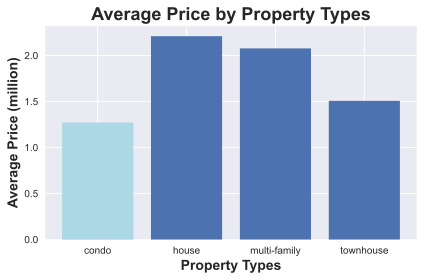

In [25]:
# property price by property type bar plot
plt.rcParams["figure.figsize"] = [6,4]
# plt.rcParams["figure.dpi"] = 200

barlist = plt.bar(type_plot["prop_type"], type_plot["Price"])

barlist[0].set_color("lightblue")
plt.title("Average Price by Property Types", fontsize = 18, weight = "bold")
plt.ylabel("Average Price (million)", fontsize = 14, weight = "bold")
ytick_lab = ["0.0", "0.5", "1.0", "1.5", "2.0", ]
plt.yticks(ticks = list(range(0, 2500000, 500000)), labels = ytick_lab)
plt.xlabel("Property Types", fontsize = 14, weight = "bold")
xtick_lab = ["condo", "house", "multi-family", "townhouse"]
plt.xticks(ticks = list(range(4)), labels = xtick_lab)
plt.tight_layout();
# plt.savefig("project2_images/avg_property_price_by_type.png");

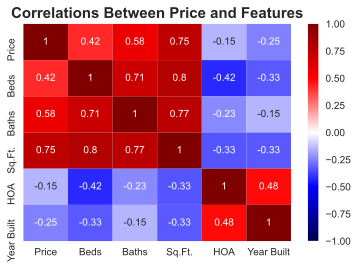

In [26]:
# look at correlations between continous variables
plt.rcParams["figure.figsize"] = [6,4]
sns.heatmap(df2.corr(), cmap = "seismic", annot = True, vmin = -1, vmax = 1)
plt.title("Correlations Between Price and Features", fontsize = 15, weight = "bold");
# plt.savefig("proj2_heatmap.svg");

In [27]:
sns.pairplot(df2)